In [8]:
def ford_fulkerson(possible_paths,graph):
    flow = 0
    # Traversing each possible path one by one
    for path in possible_paths:
        min_edge = float('inf')
        # Traversing each edge of the path
        # Finding the augmenting (minimum edge)
        for i in range(len(path)-1):
            edge_length = graph[path[i]][path[i+1]]
            min_edge = min(min_edge,edge_length)
        # Updating the capacities and handling bottlenecks (full flow)
        for i in range(len(path)-1):
            # When edge in full flow
            if graph[path[i]][path[i+1]] == 0:
                print(f'Path {path} not possible')
                break
            else:
                graph[path[i]][path[i+1]] -= min_edge
        flow += min_edge
    print(flow)

# DFS approach to find all possible paths
def dfs_paths(graph, start, goal, path=[]):
    path = path + [start]
    if start == goal:
        return [path]
    if start not in graph:
        return []
    paths = []
    for neighbor in graph[start]:
        if neighbor not in path:
            new_paths = dfs_paths(graph, neighbor, goal, path)
            for new_path in new_paths:
                paths.append(new_path)
    return paths

graph = {
    'S' : {'A' : 3, 'B' : 2},
    'A': { 'T' : 10 },
    'B': {'A':5,'T': 3}
}


# graph2 = {
#     'S' : {'A' : 100, 'B' : 100},
#     'A': {'C': 7},
#     'B': {'C': 3},
#     'C':{'T':1}
# }
# graph3 = {
#     'S' : {'A' : 9, 'D' : 3},
#     'A': {'B': 9},
#     'B': {'T': 2},
#     'D': {'C':4,'B':7},
#     'C':{'T':5}
# }

source = 'S'
target = 'T'
possible_paths = dfs_paths(graph, source, target)
print("All possible paths from", source, "to", target, ":", possible_paths)
ford_fulkerson(possible_paths,graph)

All possible paths from S to T : [['S', 'A', 'T'], ['S', 'B', 'A', 'T'], ['S', 'B', 'T']]
Path ['S', 'B', 'T'] not possible
5


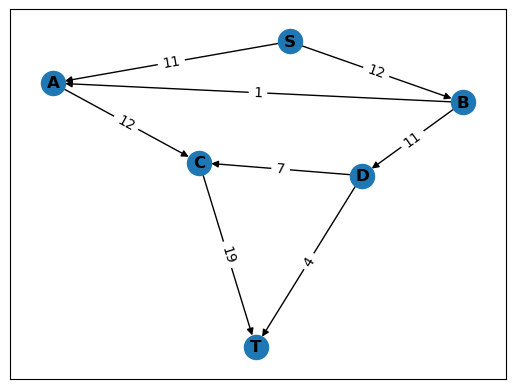

For path  ['S', 'A', 'C', 'T']  having min flow  11


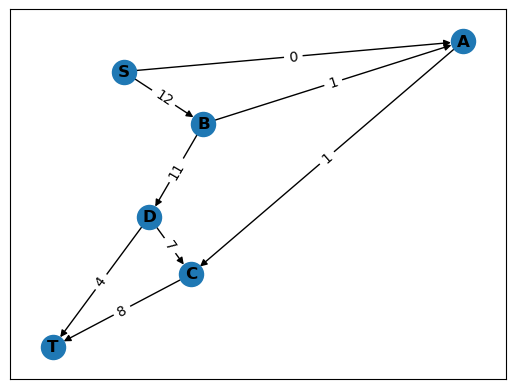

For path  ['S', 'B', 'A', 'C', 'T']  having min flow  1


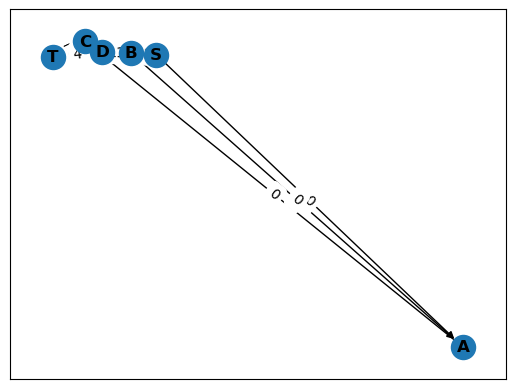

For path  ['S', 'B', 'D', 'C', 'T']  having min flow  7


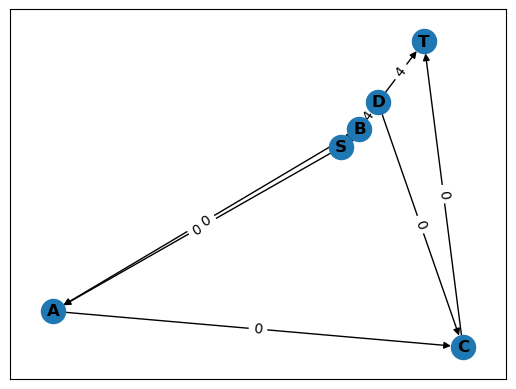

For path  ['S', 'B', 'D', 'T']  having min flow  4


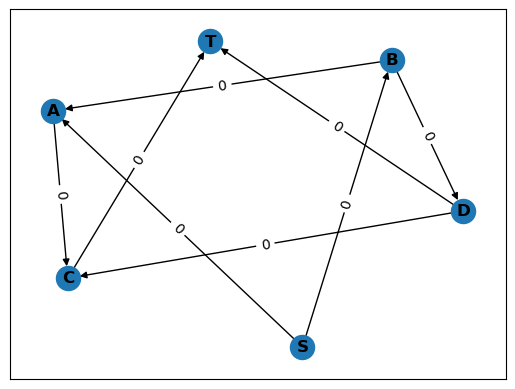

Max Flow:  23


In [1]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()


def getMinFlow(G, path):
    min_flow = 100
    for i in range(0, len(path)-1):
        temp = G[path[i]][path[i+1]]['weight']
        if (min_flow > temp):
            min_flow = temp
    return min_flow


# Create the graph
G = nx.DiGraph()
G.add_weighted_edges_from([
    ('S', 'A', 11), ('S', 'B', 12), ('A', 'C', 12),
    ('B', 'A', 1), ('B', 'D', 11), ('C', 'T', 19),
    ('D', 'C', 7), ('D', 'T', 4)
])

# Draw the initial graph
draw_graph(G)

# Find all simple paths from S to T
paths = nx.all_simple_paths(G, "S", "T")

# Initialize maximum flow
max_flow = 0

# Iterate through each path
for path in paths:
    # Find the minimum flow on the path
    temp = getMinFlow(G, path)
    print("For path ", path, " having min flow ", temp)

    # Update the graph capacity based on the minimum flow
    for i in range(0, len(path) - 1):
        G[path[i]][path[i+1]]['weight'] -= temp

    # Draw the updated graph
    draw_graph(G)

    # Update the maximum flow
    max_flow += temp

# Print the final maximum flow
print("Max Flow: ", max_flow)